In [1]:
from rydanalysis import AbsorptionImaging, OldStructure, ExpSequence, ReferenceAnalysis, RectangularMask, EllipticalMask
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Sequence path date+folder
seq_path = Path('2020_02_12/EIT_resonancescan')
# mount directory of data server
data_root = Path('/media/david/data')
# local analysis 
analysis_root = Path('/home/david/Institut/analysis')
netcdf_suffix = '.h5'

In [3]:
try: (analysis_root/seq_path).mkdir()
except FileExistsError: pass

In [4]:
# check if raw_data file was already created locally and load or create
if (analysis_root/seq_path/'raw_data.h5').is_file():
    seq = ExpSequence(analysis_root/seq_path)
else:
    seq = OldStructure(data_root/seq_path)
    seq.save_raw_data(path=analysis_root/seq_path)
data = seq.raw_data

In [5]:
crop_mask = RectangularMask(image = data.image_01).mask(center_x=10,center_y=-25, width_x=150, width_y=1000)
roi_mask = EllipticalMask(image = data.image_01).mask(center_x=10,center_y=-25, width_x=130, width_y=900)

In [6]:
ai = AbsorptionImaging.from_raw_data(data, crop_mask=crop_mask.data, mask = roi_mask.data)

/home/david/Downloads/.anaconda3/envs/lab/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
trans = ai.transmission

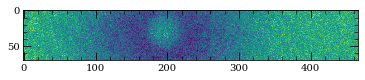

In [8]:
plt.imshow(trans[20])